


# Crop Recommendation Model

Preprocessing of crop historical data to prepare the dataset for building multiclassification models that can predict what crop type as the target variable based on the inputed conditions as the independent variable.

Cleaning and preprocessing workflow involves checking out the properities of the features and the target variables, the distibutions of the features, checking for missing values and outliers and treating them and dealing with other preprocessing techniques that applies to the dataset.

Thereafter the ML model used was lgbmclassifer, acheiving a 98% accuracy.



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
crop_df = pd.read_csv('/content/Crop_recommendation.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop_df.shape

(2200, 8)

In [4]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop_df.duplicated().sum()

0

In [6]:
crop_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
col = crop_df.columns

In [8]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

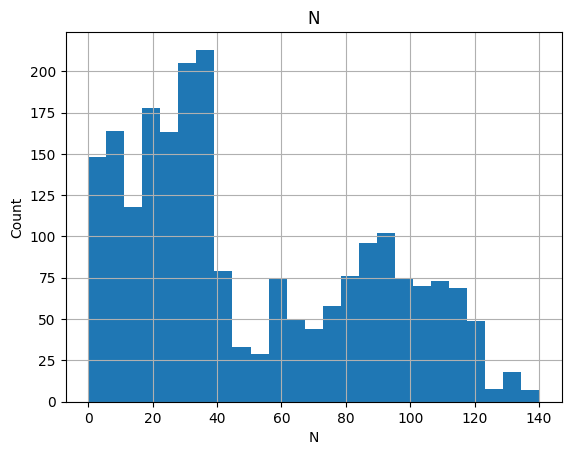

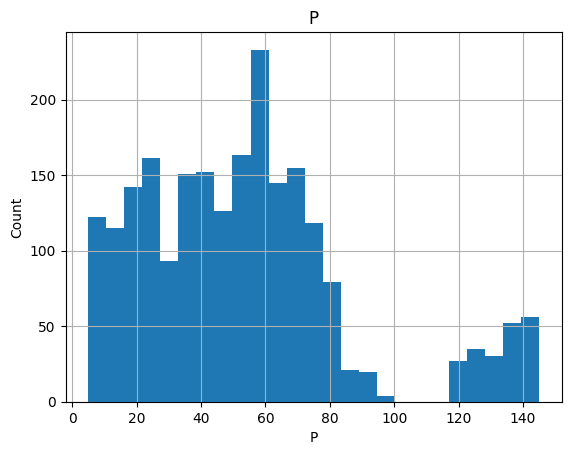

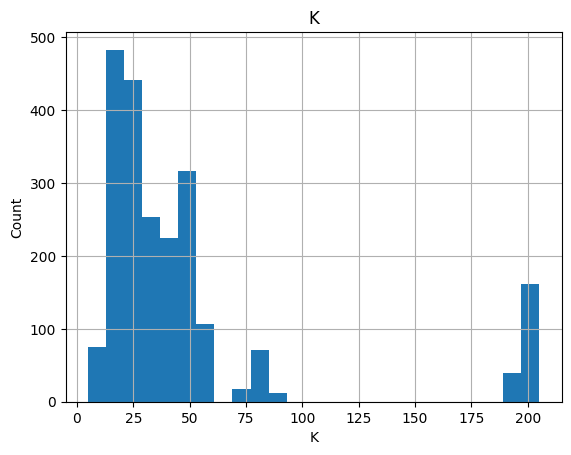

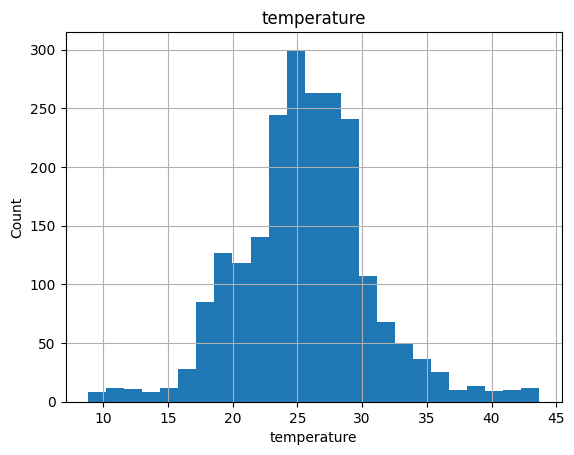

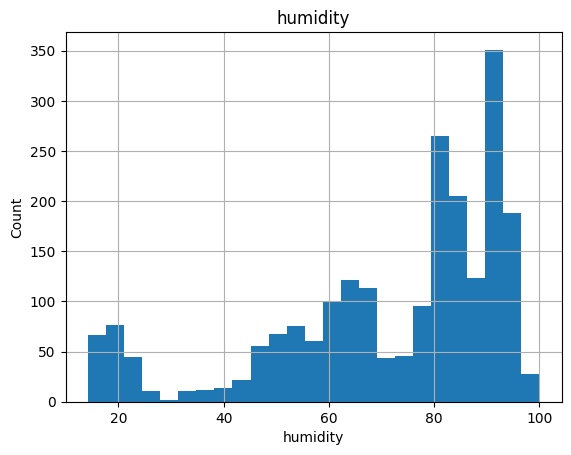

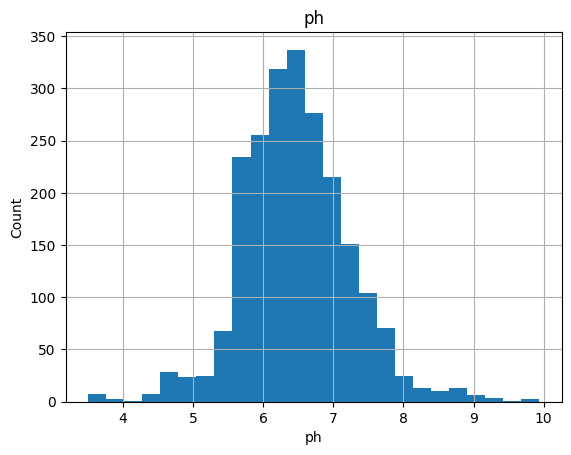

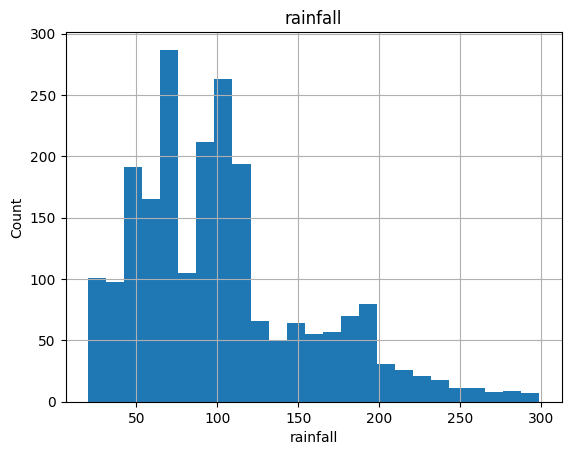

In [9]:
for i in col: # Checking for the distribution of all independent features
  if i != 'label':
    crop_df[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

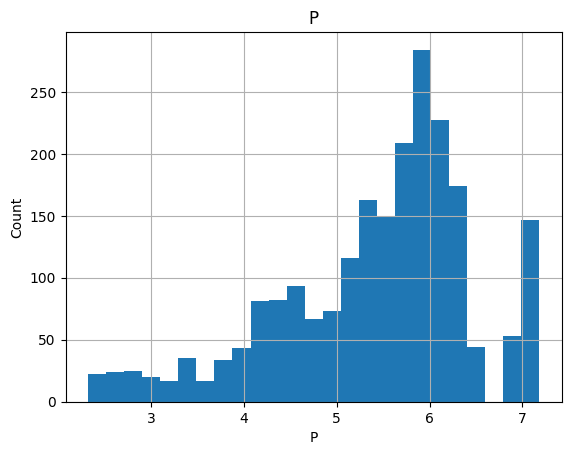

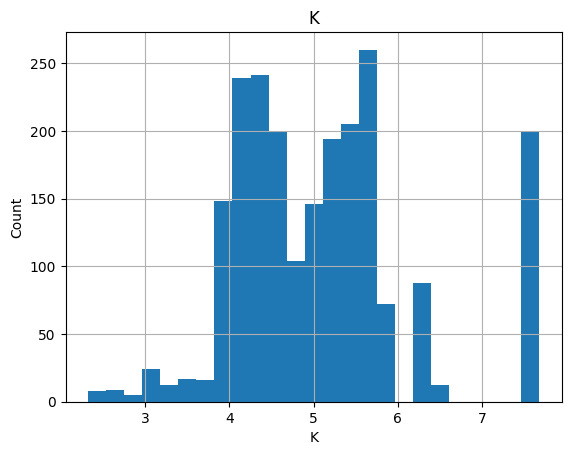

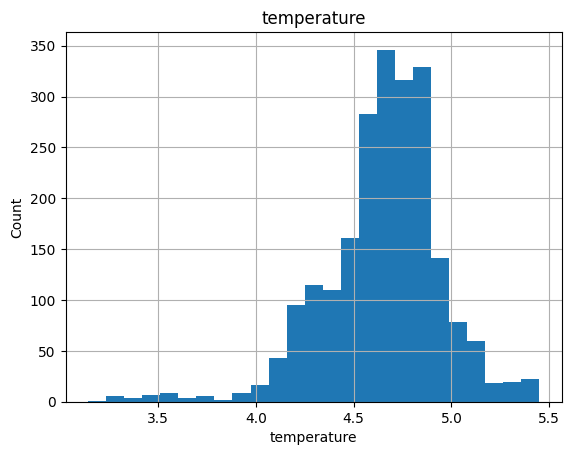

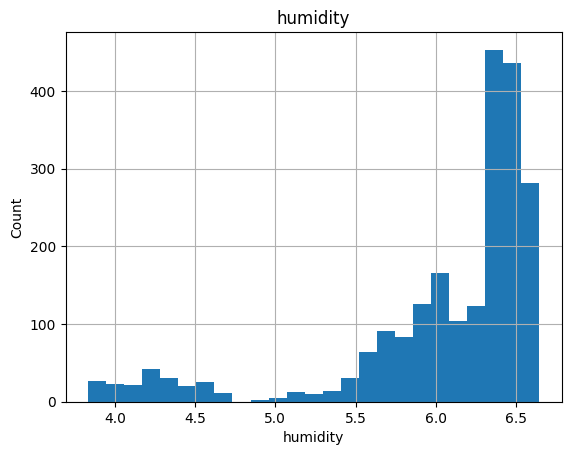

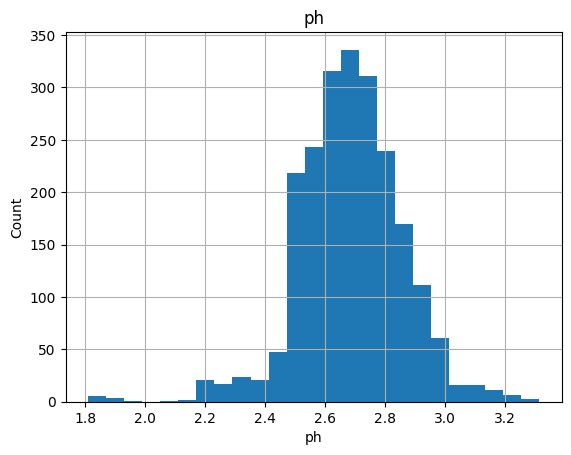

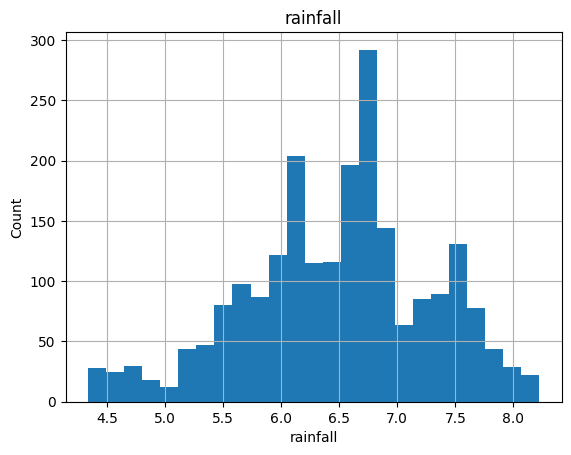

In [10]:
# The distribution plot from the features above have some noticeable biases because they are skewed and can be corrected with the log transformation.
new_crop = crop_df.copy()
cols = ['N', 'P', 'K', 'humidity', 'rainfall']
for i in col:
  if 0 in new_crop[i].unique() or i == 'label':
    pass
  else:
    new_crop[i] = np.log2(new_crop[i])
    new_crop[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

In [11]:
crop_df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

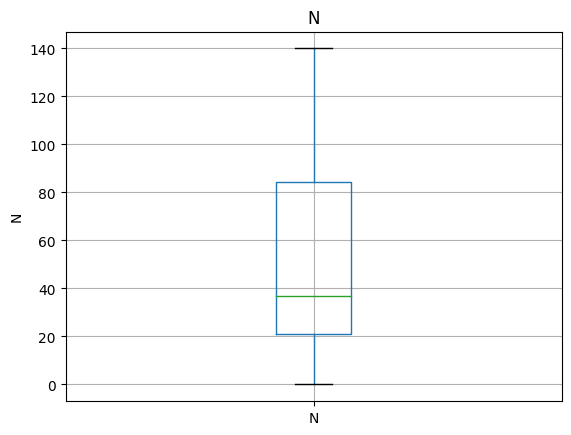

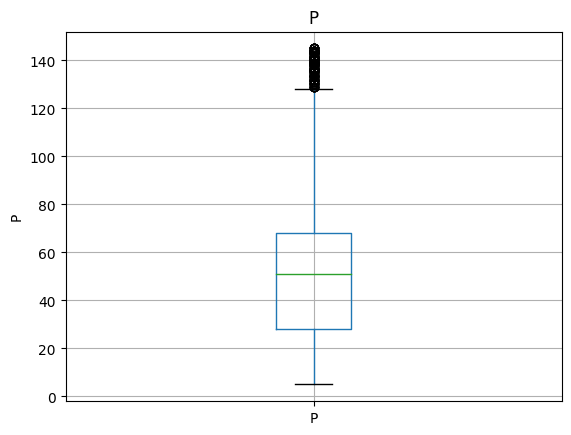

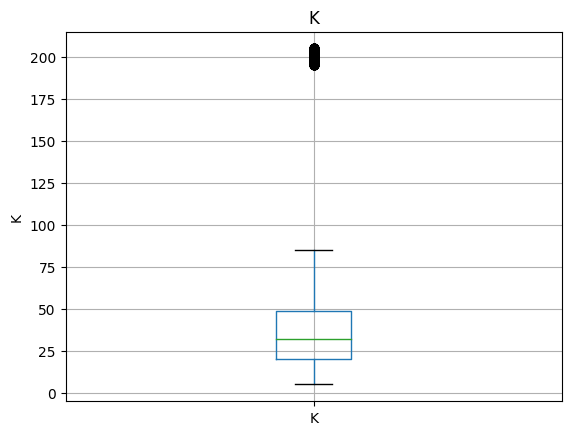

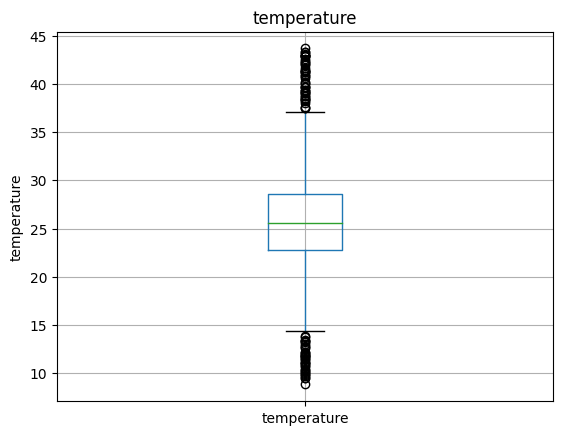

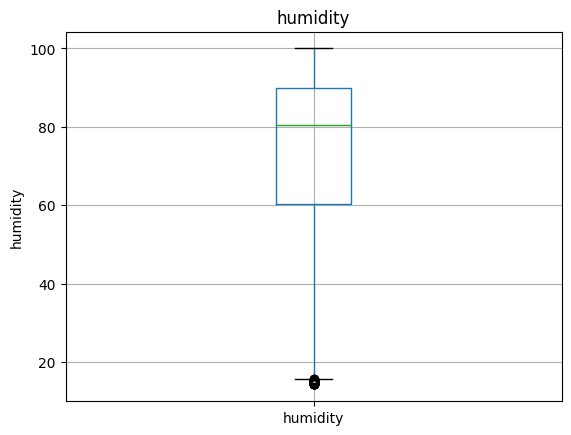

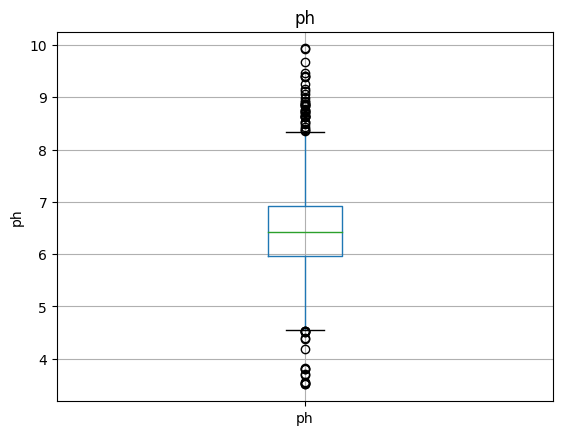

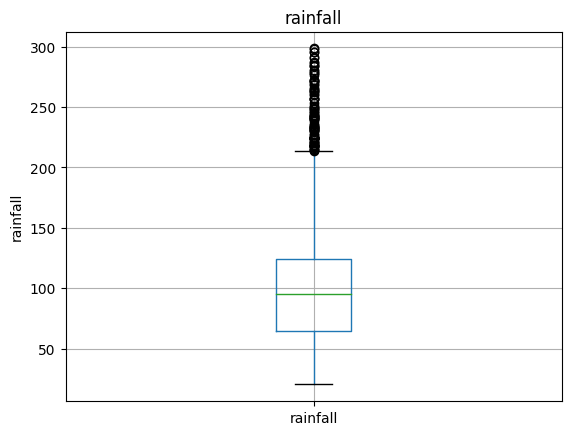

In [12]:
for i in col:
    if i != 'label':
        crop_df.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

In [13]:
# Quantile
lower = {} # Lower Quantile
higher = {} # Higher Quantile
cols = ['P', 'K', 'humidity', 'rainfall']
for i in cols:
  low_quan = crop_df[i].quantile(0.05)
  high_quan = crop_df[i].quantile(0.75)
  if i not in lower:
     lower[i] = low_quan
  if i not in higher:
     higher[i] = high_quan

In [14]:
lower

{'P': 10.0, 'K': 15.0, 'humidity': 19.3749174555, 'rainfall': 33.8235117215}

In [15]:
higher

{'P': 68.0, 'K': 49.0, 'humidity': 89.948770755, 'rainfall': 124.2675078}

In [16]:
#new_df = crop_df[(crop_df['P'] > 15.0 ) & (crop_df['P'] < 199.5]

for i in cols:
  if i in lower:
    new_df = crop_df[crop_df[i] > lower[i]]

for i in cols:
  if i in higher:
    new_df = new_df[new_df[i] < higher[i]]


new_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


for i in cols:
  if (i in lower) & (i in higher):
    new_df = crop_df[(crop_df[i] > lower[i]) & (crop_df[i] < higher[i])]

new_df.head()

In [17]:
new_df.shape

(728, 8)

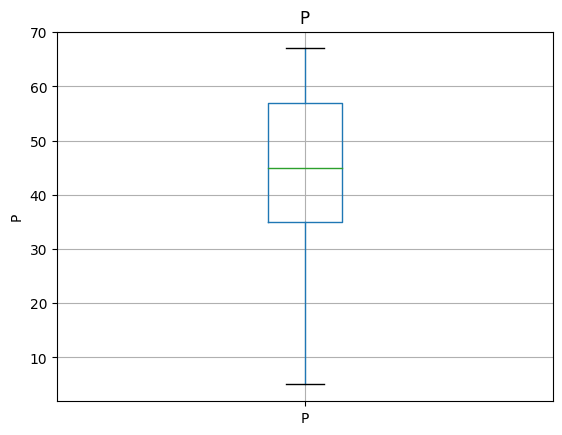

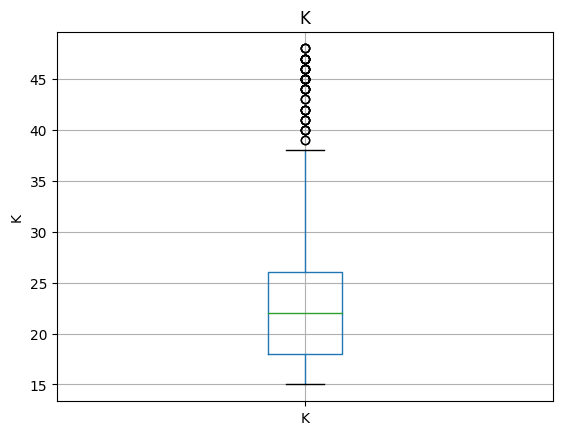

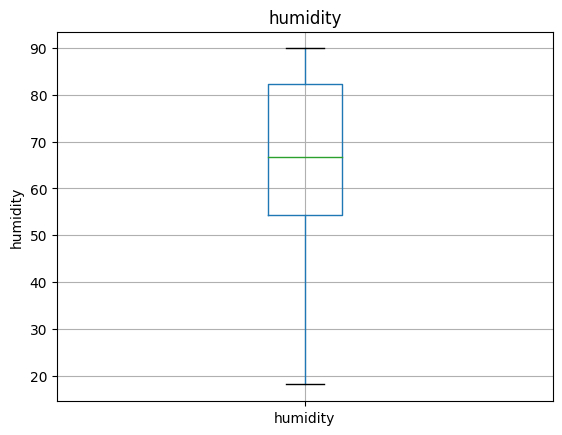

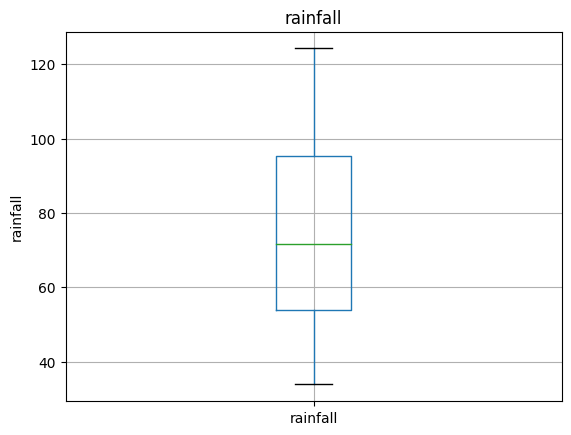

In [18]:
for i in cols:
    new_df.boxplot(column=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 100 to 2171
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            728 non-null    int64  
 1   P            728 non-null    int64  
 2   K            728 non-null    int64  
 3   temperature  728 non-null    float64
 4   humidity     728 non-null    float64
 5   ph           728 non-null    float64
 6   rainfall     728 non-null    float64
 7   label        728 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 51.2+ KB


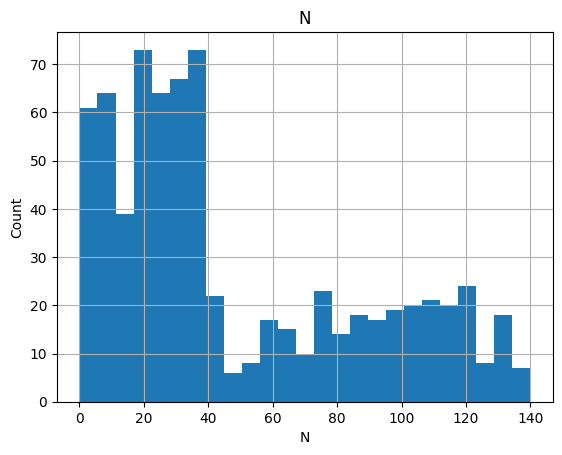

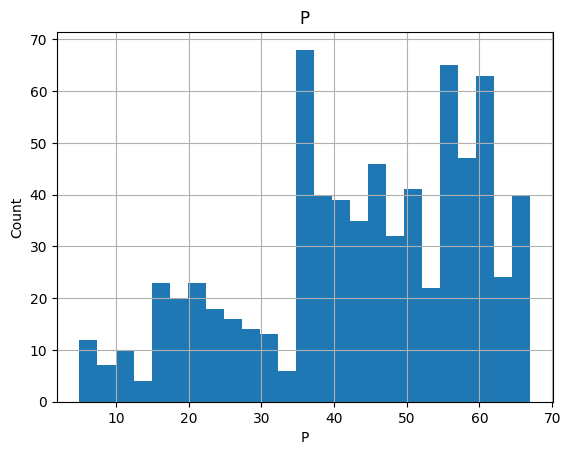

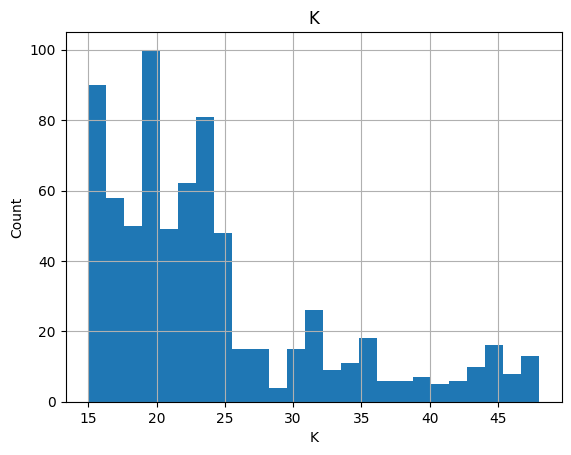

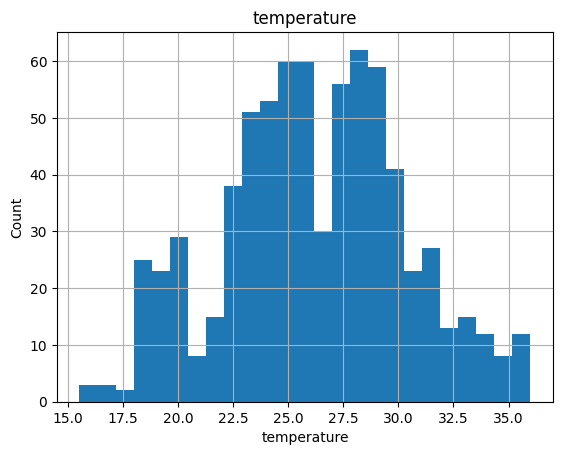

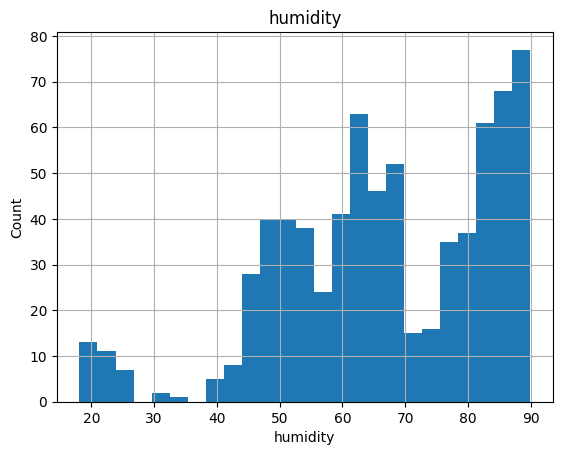

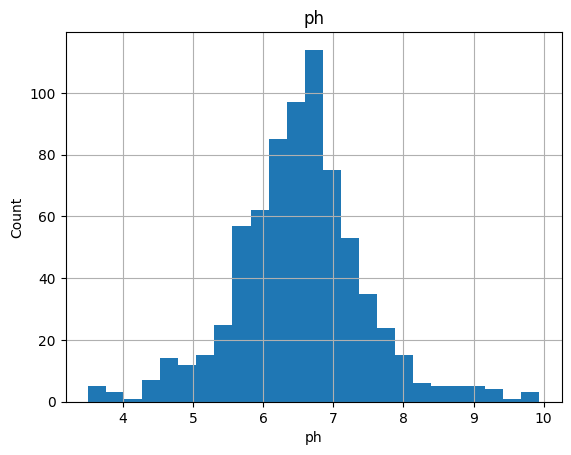

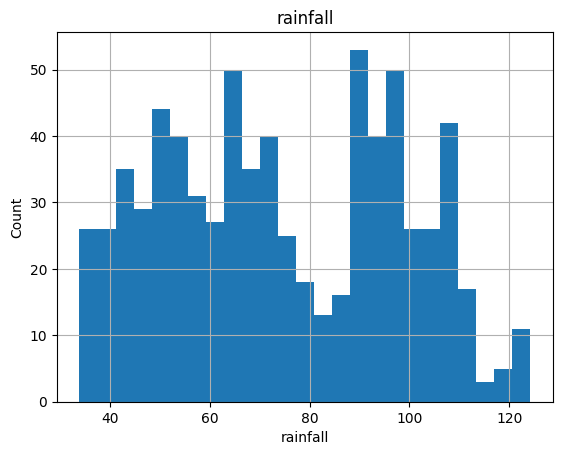

In [20]:
for i in col: # Checking for the distribution of all independent features
  if i != 'label':
    new_df[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

In [21]:
X = new_df.drop('label', axis=1)
Y = new_df['label']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [23]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)

LGBMClassifier()

In [63]:
Y_Pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(Y_Pred, Y_test)
ConfusionM = confusion_matrix(Y_test, Y_Pred)
print("Accuracy Score: ", accuracy)
print("Confusion Matrix: ", ConfusionM)

Accuracy Score:  0.9863013698630136
Confusion Matrix:  [[10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4]]


In [27]:
print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

   blackgram       1.00      1.00      1.00        10
      coffee       1.00      1.00      1.00         2
      cotton       0.96      1.00      0.98        26
 kidneybeans       1.00      1.00      1.00         8
      lentil       1.00      1.00      1.00         7
       maize       1.00      0.96      0.98        23
       mango       0.93      1.00      0.96        13
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        16
  pigeonpeas       1.00      0.50      0.67         2
 pomegranate       1.00      1.00      1.00        16
  watermelon       1.00      1.00      1.00         4

    accuracy                           0.99       146
   macro avg       0.99      0.95      0.97       146
weighted avg       0.99      0.99      0.99       146



In [61]:
Y_test.iloc[1]

'cotton'

In [46]:
#Y_Pred = pd.DataFrame(Y_Pred)

In [64]:
Y_Pred[0]

'maize'

In [66]:
for i in range (len(X_test)):
  #print(X_test.iloc[i])
  print("The Predicted crop {} should be same as the real crop {}".format(Y_Pred[i], Y_test.iloc[i]))

The Predicted crop maize should be same as the real crop maize
The Predicted crop cotton should be same as the real crop cotton
The Predicted crop coffee should be same as the real crop coffee
The Predicted crop cotton should be same as the real crop cotton
The Predicted crop mothbeans should be same as the real crop mothbeans
The Predicted crop kidneybeans should be same as the real crop kidneybeans
The Predicted crop mango should be same as the real crop mango
The Predicted crop mango should be same as the real crop mango
The Predicted crop mothbeans should be same as the real crop mothbeans
The Predicted crop lentil should be same as the real crop lentil
The Predicted crop mungbean should be same as the real crop mungbean
The Predicted crop mango should be same as the real crop mango
The Predicted crop mothbeans should be same as the real crop mothbeans
The Predicted crop kidneybeans should be same as the real crop kidneybeans
The Predicted crop kidneybeans should be same as the rea

In [67]:
import pickle

pickle.dump(model, open('CRM.pkl', 'wb'))